In [146]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import re
import numpy
from functools import reduce 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb
from IPython.display import Image

# Leyendo csv de los datos historicos

In [64]:
# precio de etherium por dia desde el 24 de dic de 2016 hasta el 24 de enero de 2020
csv = pd.read_csv('Ethereum Historical Data - Investing.com.csv')
csv['Date'] = pd.to_datetime(csv['Date'], infer_datetime_format=True)
csv_df = csv.sort_values(by='Date').reset_index()
csv_df.tail(5)

,index,Date,Price,Open,High,Low,Vol.,Change %
1122,4,2020-01-20,166.87,166.92,169.24,161.61,11.30M,-0.03%
1123,3,2020-01-21,169.41,166.87,169.79,165.53,11.52M,1.52%
1124,2,2020-01-22,168.13,169.41,171.27,166.19,11.30M,-0.76%
1125,1,2020-01-23,162.80,168.15,168.25,159.78,14.86M,-3.17%
1126,0,2020-01-24,163.08,162.80,164.27,155.65,15.33M,0.18%


# request de la api de cryptocompare

In [65]:
# ultimas 1000 transacciones registradas en el mercado de etherium por dia, todos los precios son en usd
response = requests.get('https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=1127')
read = response.json()
high = []
low = []
open=[]
close = []
for i in read['Data']['Data']:
    high.append(i['high'])
    low.append(i['low'])
    open.append(i['open'])
    close.append(i['close'])

In [66]:
df = pd.DataFrame()
df['Open'] = open
df['High'] = high
df['Low'] = low
df['Close'] = close
df.tail(5)

,Open,High,Low,Close
1123,169.090000,170.220000,165.280000,167.970000
1124,167.970000,164.020000,160.410000,162.510000
1125,162.510000,163.750000,158.770000,162.400000
1126,162.400000,161.580000,158.400000,160.660000
1127,160.360000,161.560000,159.430000,160.740000


# csv yahoo finances

In [67]:
yah = pd.read_csv('ETH-USD.csv')
yah['Date'] = pd.to_datetime(yah['Date'], infer_datetime_format=True)
yah.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1122,2020-01-20,166.904129,169.114883,162.331604,167.120514,167.120514,11144529787
1123,2020-01-21,167.060471,169.910110,165.819717,169.697159,169.697159,9789369362
1124,2020-01-22,169.608536,171.008698,166.774231,168.294159,168.294159,9209827927
1125,2020-01-23,168.295700,168.312241,160.295319,162.928558,162.928558,10396868698
1126,2020-01-24,162.950241,164.293701,156.750778,163.630173,163.630173,10699618304


In [68]:
data = csv_df.join(df['Close'])
final = data.join(yah[['Adj Close', 'Volume']])
final2 = final.drop('index', axis=1)
final3 = final2[['Date','Price','Open','High','Low','Close','Adj Close','Vol.','Volume','Change %']]

final3.dtypes

Date         datetime64[ns]
Price                object
Open                 object
High                 object
Low                  object
Close               float64
Adj Close           float64
Vol.                 object
Volume                int64
Change %             object
dtype: object

In [69]:
final3['Price'] = final3['Price'].str.replace(',','')
final3['Open']=final3['Open'].str.replace(',','')
final3['High']=final3['High'].str.replace(',','')
final3['Low']=final3['Low'].str.replace(',','')
final3['Change %']=final3['Change %'].str.replace("%", '')

In [70]:
final3 = final3.astype({'Price':'float64'})
final3 = final3.astype({'Open':'float64'})
final3 = final3.astype({'High':'float64'})
final3 = final3.astype({'Low':'float64'})
final3 = final3.astype({'Change %':'float64'})
final3.dtypes

Date         datetime64[ns]
Price               float64
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Vol.                 object
Volume                int64
Change %            float64
dtype: object

In [71]:
final3

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2016-12-24,7.250000,7.110000,7.350000,7.110000,7.164000,7.265770,56.77K,7626020,1.260000
1,2016-12-25,7.230000,7.250000,7.320000,7.170000,7.212000,7.175080,16.44K,8671840,-0.280000
2,2016-12-26,7.270000,7.110000,7.350000,7.050000,7.142000,7.274090,78.87K,5836810,0.550000
3,2016-12-27,7.120000,7.270000,7.330000,7.080000,7.465000,7.170820,40.80K,8778610,-2.060000
4,2016-12-28,7.580000,7.200000,7.760000,7.100000,8.214000,7.520110,177.26K,17453300,6.460000
...,...,...,...,...,...,...,...,...,...,...
1122,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
1123,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
1124,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000
1125,2020-01-23,162.800000,168.150000,168.250000,159.780000,162.400000,162.928558,14.86M,10396868698,-3.170000


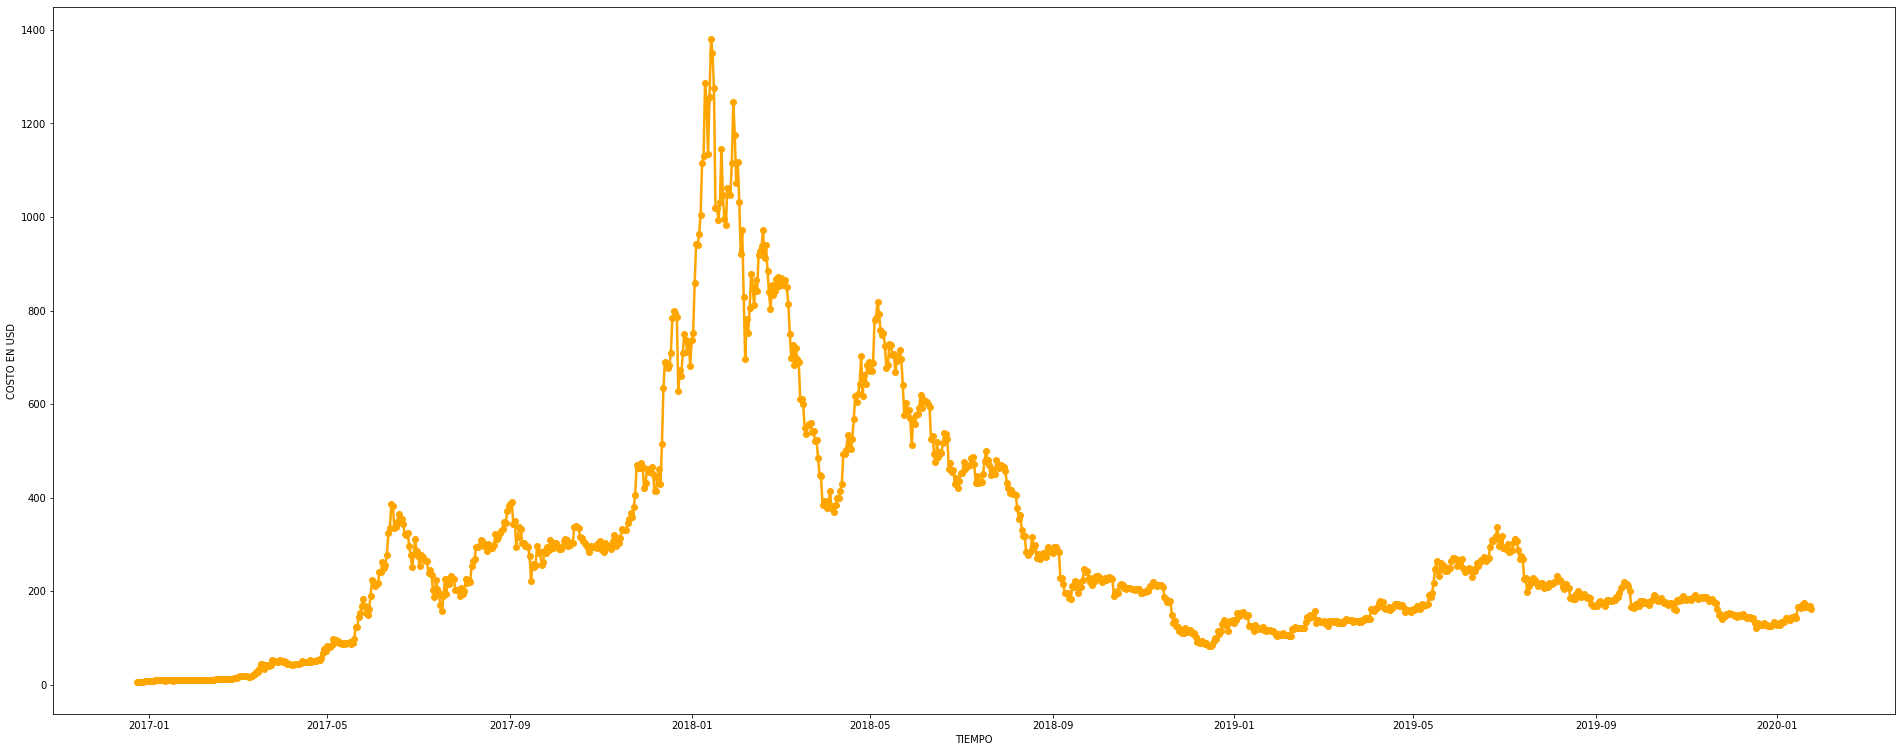

In [106]:
plt.figure(figsize=[33,13],edgecolor='black',frameon=False)
#degrees = 50
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
date = final3['Date']
ope = final3['Open']
#plt.xticks(rotation=degrees)
plt.plot(date, ope,linewidth=2.5,color = 'orange',marker='o' )

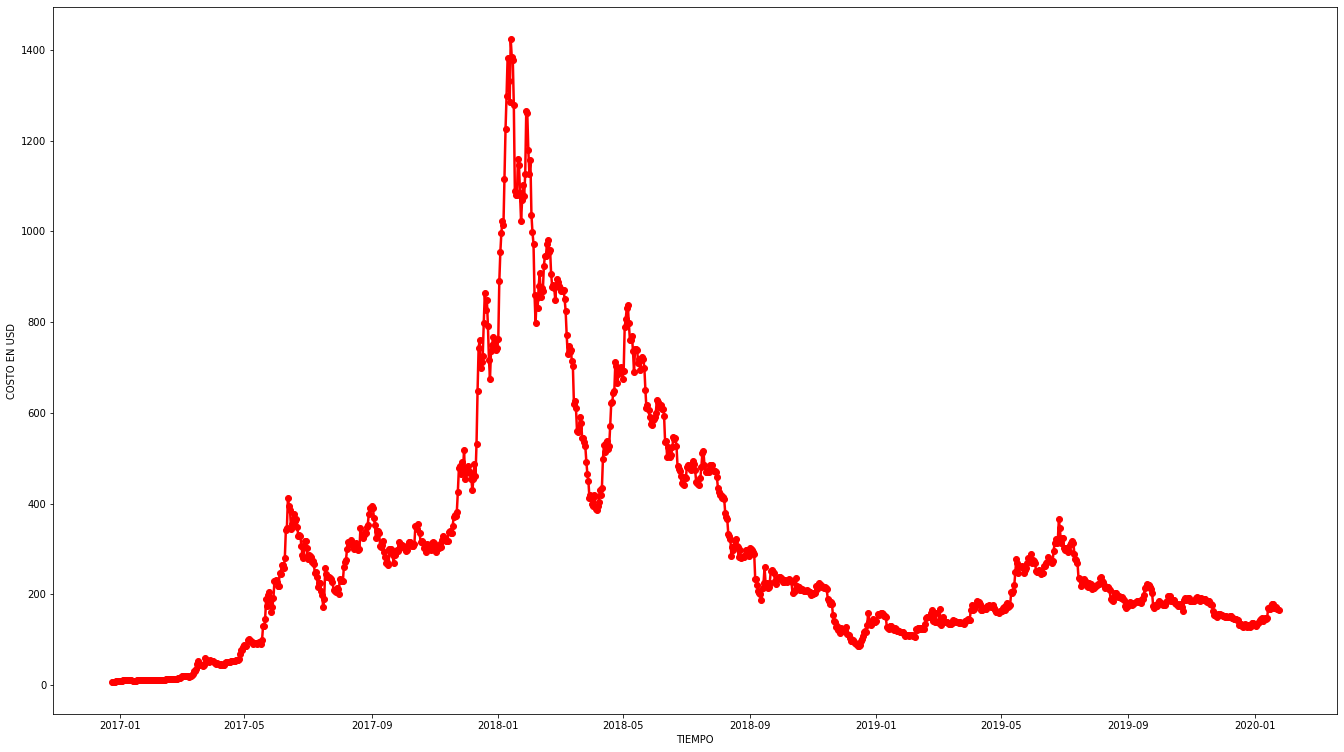

In [107]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
hig = final3['High']
plt.plot(date,hig,linewidth=2.5, color='red',marker='o')

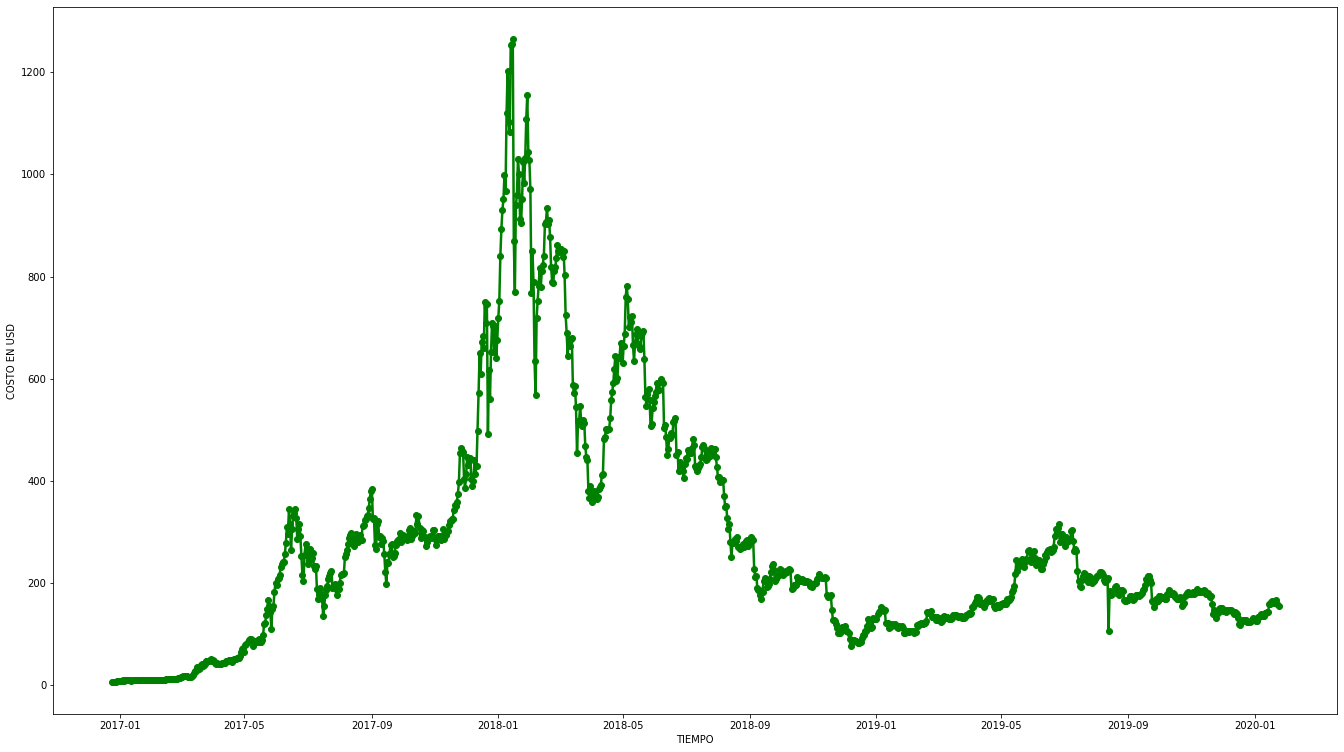

In [108]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
plt.xlabel('TIEMPO')
plt.ylabel('COSTO EN USD')
lo = final3['Low']
plt.plot(date,lo,linewidth=2.5, label='Low',c='green',marker='o')
plt.show()

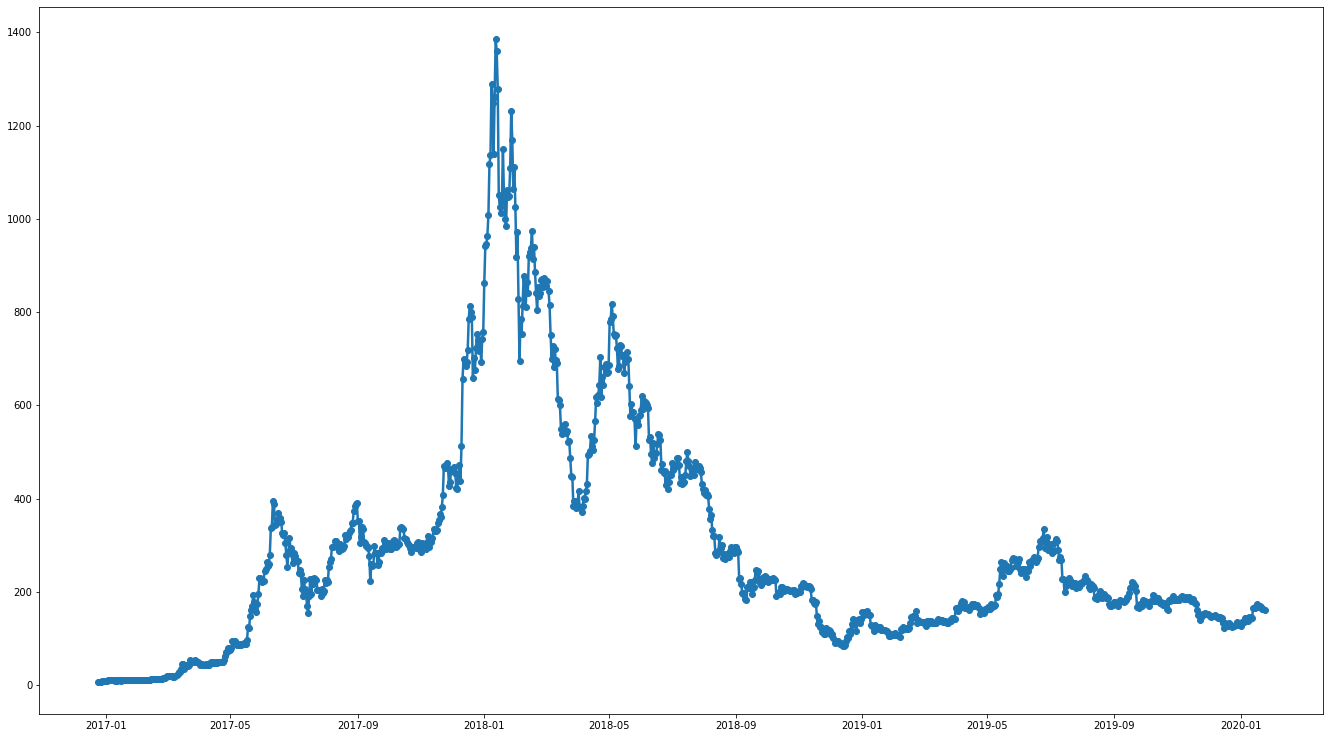

In [109]:
plt.figure(figsize=[23,13],frameon=False)
clo = final3['Close']
plt.plot(date,clo,linewidth=2.5, marker='o')
plt.show()

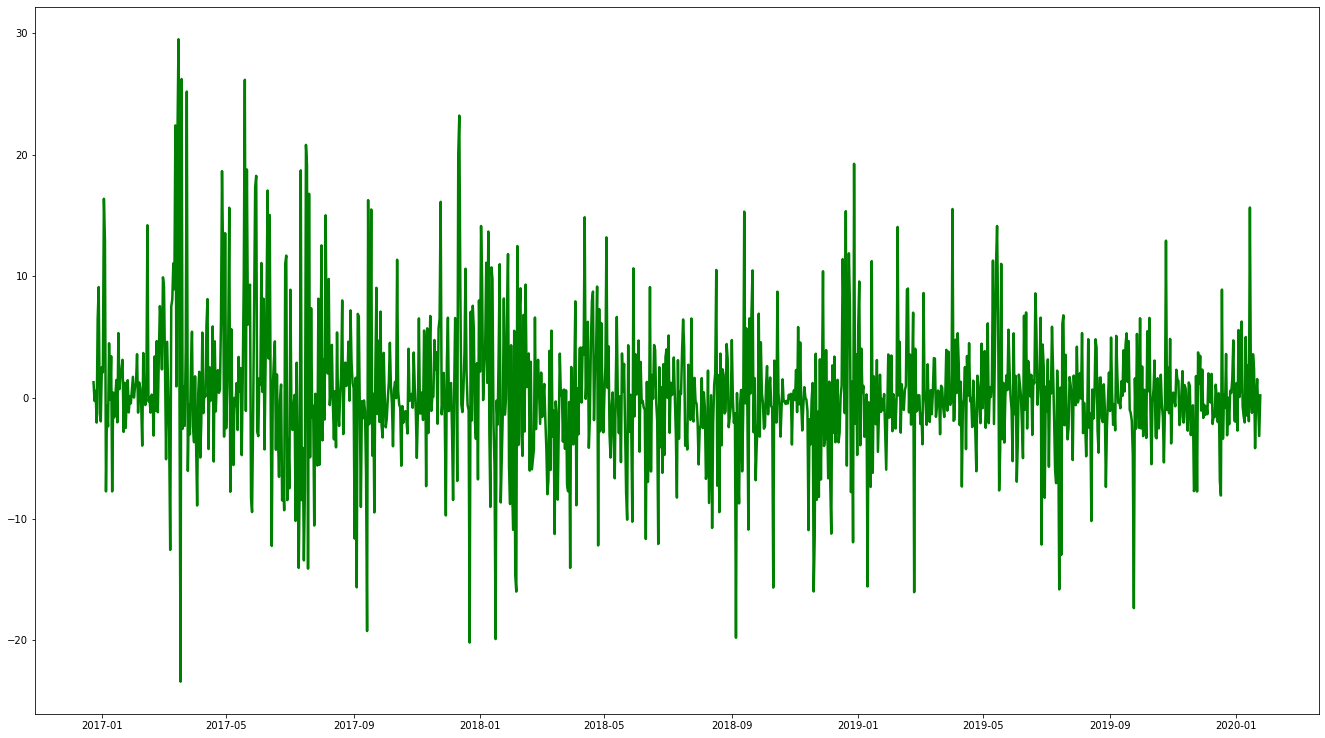

In [77]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
chang = final3['Change %']
plt.plot(date,chang,linewidth=2.5, label='Low',c='green')
plt.show()

In [78]:
# describe de el dataset 
final3

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %
0,2016-12-24,7.250000,7.110000,7.350000,7.110000,7.164000,7.265770,56.77K,7626020,1.260000
1,2016-12-25,7.230000,7.250000,7.320000,7.170000,7.212000,7.175080,16.44K,8671840,-0.280000
2,2016-12-26,7.270000,7.110000,7.350000,7.050000,7.142000,7.274090,78.87K,5836810,0.550000
3,2016-12-27,7.120000,7.270000,7.330000,7.080000,7.465000,7.170820,40.80K,8778610,-2.060000
4,2016-12-28,7.580000,7.200000,7.760000,7.100000,8.214000,7.520110,177.26K,17453300,6.460000
...,...,...,...,...,...,...,...,...,...,...
1122,2020-01-20,166.870000,166.920000,169.240000,161.610000,169.090000,167.120514,11.30M,11144529787,-0.030000
1123,2020-01-21,169.410000,166.870000,169.790000,165.530000,167.970000,169.697159,11.52M,9789369362,1.520000
1124,2020-01-22,168.130000,169.410000,171.270000,166.190000,162.510000,168.294159,11.30M,9209827927,-0.760000
1125,2020-01-23,162.800000,168.150000,168.250000,159.780000,162.400000,162.928558,14.86M,10396868698,-3.170000


In [79]:
pd.set_option('float_format', '{:f}'.format)
stats = round(final3.describe(),2)
stats = stats.drop('Volume', axis=1).T
stats

,count,mean,std,min,25%,50%,75%,max
Price,1127.000000,289.150000,241.290000,7.120000,139.460000,213.180000,338.620000,1380.000000
Open,1127.000000,289.020000,241.400000,7.110000,139.190000,213.100000,338.620000,1379.900000
High,1127.000000,300.740000,253.340000,7.320000,144.560000,220.530000,351.790000,1423.200000
Low,1127.000000,275.240000,226.280000,7.050000,135.600000,205.000000,324.750000,1264.400000
Close,1127.000000,289.830000,241.780000,7.140000,140.670000,211.660000,341.760000,1385.020000
Adj Close,1127.000000,291.270000,243.900000,7.170000,140.750000,212.230000,344.610000,1396.420000
Change %,1127.000000,0.440000,5.820000,-23.400000,-2.230000,0.050000,2.850000,29.510000


In [80]:
stats['IQR'] = stats['75%']-stats['25%']
cutoff = stats['IQR']*1.5
stats['LimiteSuperior']=stats['75%']+cutoff
stats['LimiteInferior']=stats['25%']-cutoff
stats['Range'] = stats['LimiteSuperior']-stats['LimiteInferior']
stats

,count,mean,std,min,25%,50%,75%,max,IQR,LimiteSuperior,LimiteInferior,Range
Price,1127.000000,289.150000,241.290000,7.120000,139.460000,213.180000,338.620000,1380.000000,199.160000,637.360000,-159.280000,796.640000
Open,1127.000000,289.020000,241.400000,7.110000,139.190000,213.100000,338.620000,1379.900000,199.430000,637.765000,-159.955000,797.720000
High,1127.000000,300.740000,253.340000,7.320000,144.560000,220.530000,351.790000,1423.200000,207.230000,662.635000,-166.285000,828.920000
Low,1127.000000,275.240000,226.280000,7.050000,135.600000,205.000000,324.750000,1264.400000,189.150000,608.475000,-148.125000,756.600000
Close,1127.000000,289.830000,241.780000,7.140000,140.670000,211.660000,341.760000,1385.020000,201.090000,643.395000,-160.965000,804.360000
Adj Close,1127.000000,291.270000,243.900000,7.170000,140.750000,212.230000,344.610000,1396.420000,203.860000,650.400000,-165.040000,815.440000
Change %,1127.000000,0.440000,5.820000,-23.400000,-2.230000,0.050000,2.850000,29.510000,5.080000,10.470000,-9.850000,20.320000


In [81]:
x = ['Price','Open','High','Low','Close','AdjClose','Change%']
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
stats2 = stats.drop('count',axis=1)
cols = []
for i in stats2.columns:
    cols.append(i)
cols

['mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'IQR',
 'LimiteSuperior',
 'LimiteInferior',
 'Range']

<Figure size 1656x936 with 0 Axes>

In [163]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
stats3 = stats2

<Figure size 1656x936 with 0 Axes>

<BarContainer object of 11 artists>

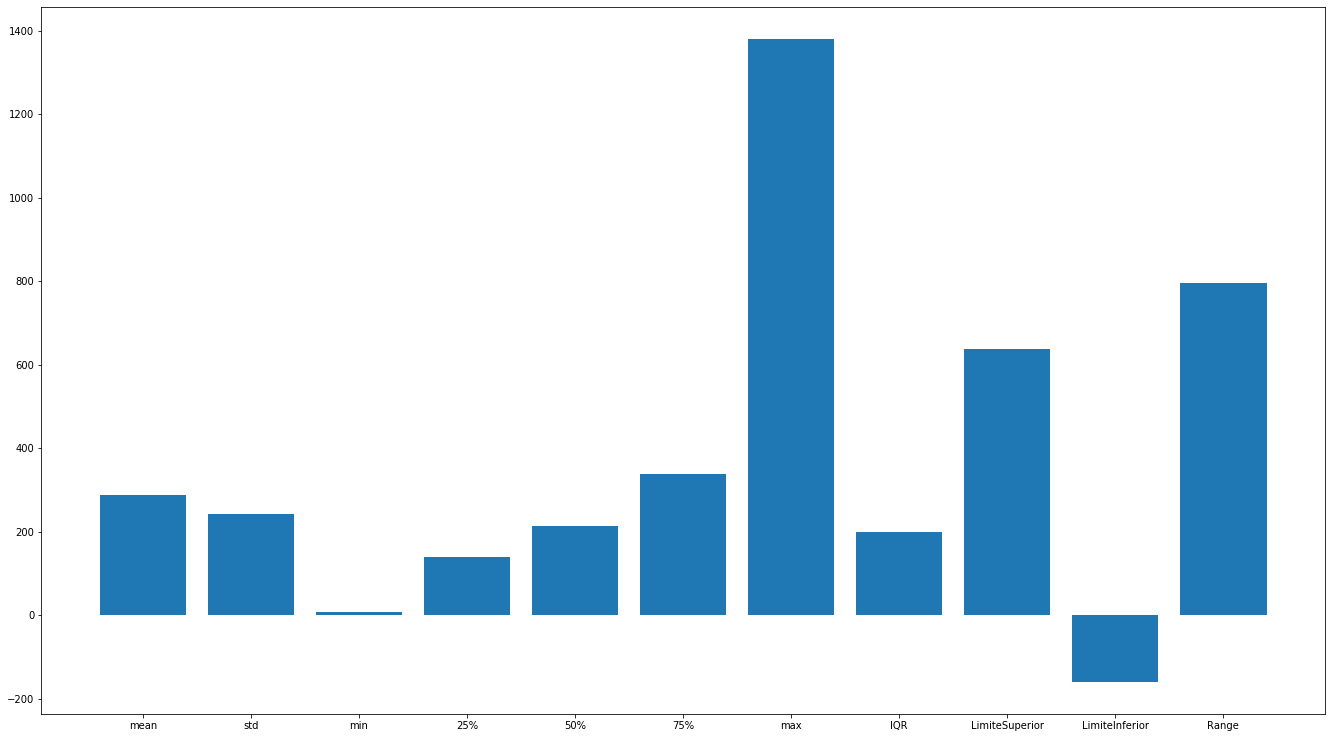

In [83]:
plt.figure(figsize=[23,13],edgecolor='black',frameon=False)
stats3 = stats2.T
plt.bar(cols,stats3['Price'])

# formula utilizada #  falta desarrollo #

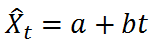

In [148]:
Image(filename='regre.png')

# Donde
# Xt = Pronostico del periodo
# a = interseccion de la linea con el eje
# b = pendiente
# t = periodo de tiempo

# Formula de la pendiente

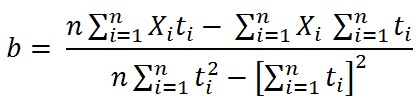

In [149]:
Image(filename='pendiente.png')

# Formula de la interseccion 

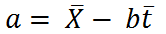

In [150]:
Image(filename='A.png')

# sumatoria de la mutliplicacion del tiempo por el precio en dias 

In [127]:
tiempo = []
for i in range(len(final3['Date'])):
    tiempo.append(i+1)
price = []
for e in final3['Price']:
    price.append(e)
lst = []
new = list(zip(tiempo,price)) 
multi = []
for i in new:
     multi.append(i[0] * i[1])
sum_mult = sum(multi)
sum_mult

174111953.72000024

# sumatoria de los precios 

In [123]:
sum_price = round(sum(price),3)
sum_price

325875.41

# Sumatoria del tiempo

In [86]:
sum_time = sum(tiempo)
sum_time

635628

# N

In [87]:
total_time= len(final3['Date'])

# Tiempo individual al cuadrado

In [88]:
time_sqr = []
for i in tiempo:
    time_sqr.append(i**2)
sum_time_sqr = sum(time_sqr)
sum_time_sqr

477780380

# suma de los tiempos al cuadrado

In [89]:
time_sqr = sum_time ** 2
time_sqr

404022954384

# Numero de datos

In [122]:
n = len(tiempo)
n

1127

# pendiente

In [124]:
pendiente = ((n*(sum_mult)- (sum_price*sum_time)) / ((n*sum_time_sqr) - time_sqr))
pendiente

-0.08116427963981866

# Valor de A

# media de el precio = x media

In [141]:
x_mean = final3['Price'].mean()

# media de el tiempo 

In [142]:
t_mean = sum(range(len(final3['Date']))) / len(final3['Date'])
t_mean

563.0

# a = x_mean -(b)(time_mean)

In [143]:
a = x_mean- (pendiente * t_mean)
a

334.84847080367757

# Pronostico del periodo

In [153]:
X_T = a + (pendiente * 1126)
X_T

243.45749192924177